In [35]:
#import the necessary libaries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics 
import seaborn as sns
#import scikitplot as skl
sns.set()

#loading the dataset
data = sm.datasets.fair.load_pandas().data

#print the first 5 rows of the dataframe
data.head(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


## Basic EDA and Statistical Analysis

In [36]:
# gives information about the data types,columns, null value counts, memory usage etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [37]:
data['affairs']=(data['affairs']>0).astype(int)

In [38]:
#let's see basic statistics details about data
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [39]:
#missing values
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

0    4313
1    2053
Name: affairs, dtype: int64


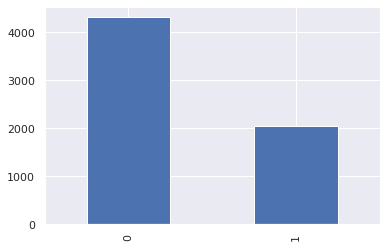

In [40]:
print(data.affairs.value_counts())
data.affairs.value_counts().plot(kind='bar')

The above graph shows that the data is biased towards datapoints having affairs valus as 0. The number of no affairs is almost twice the number of affairs.

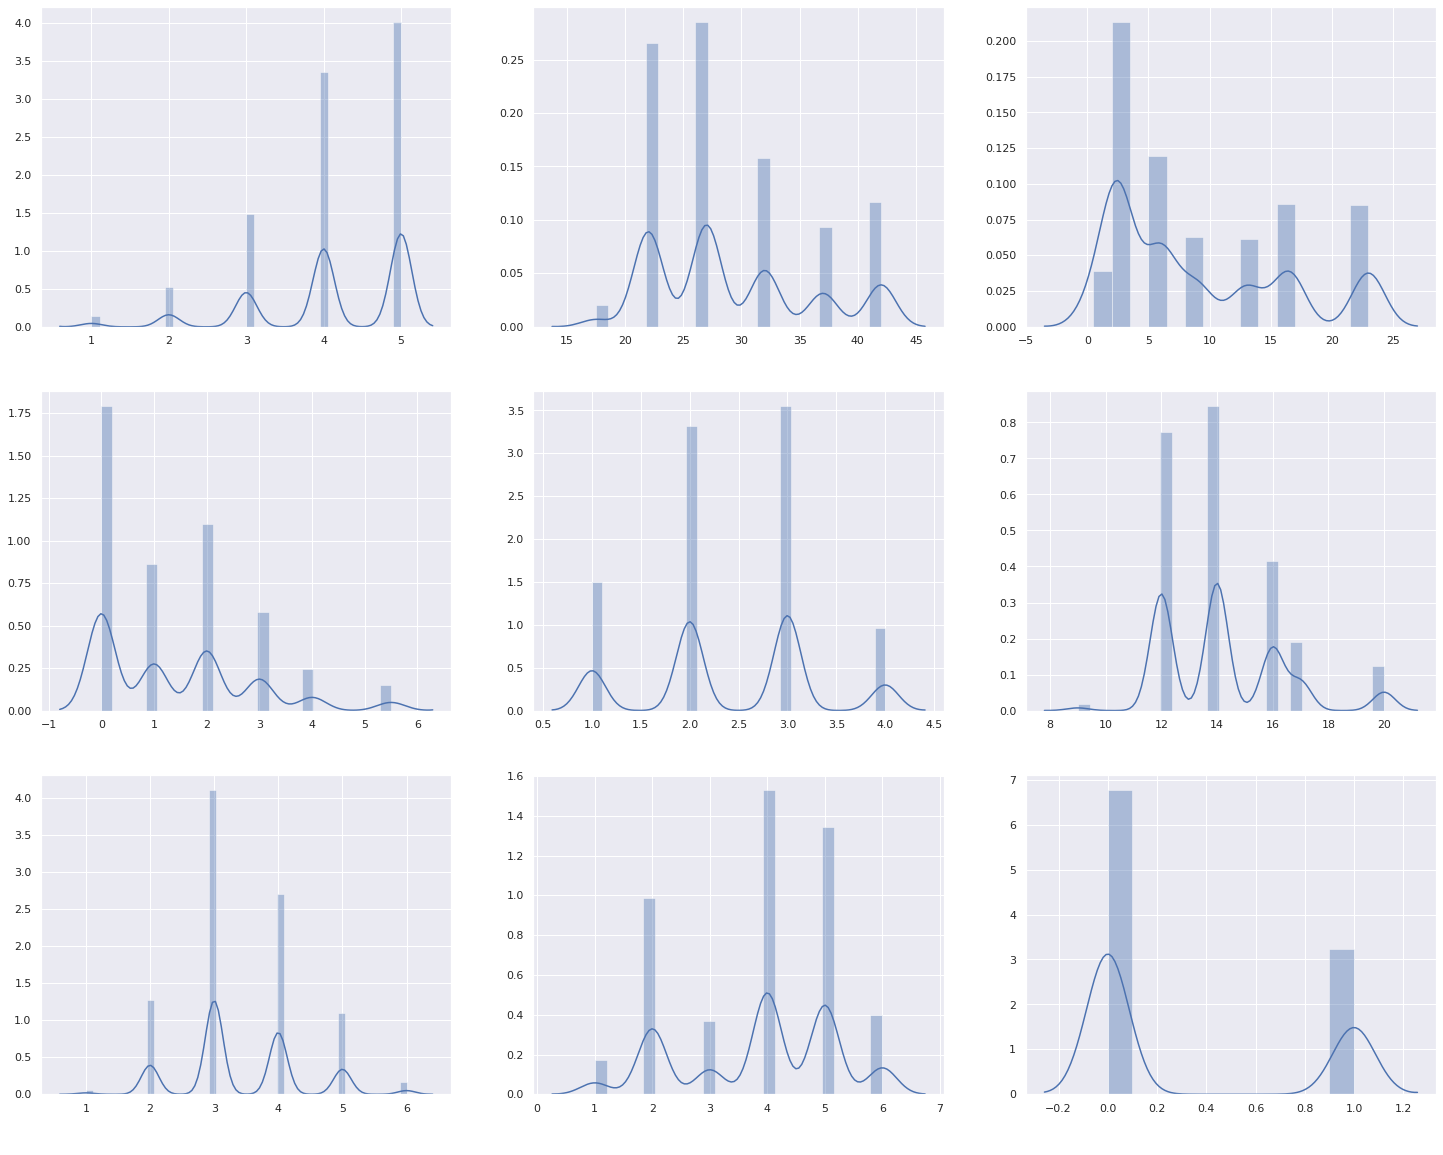

In [41]:
#let's see how data is distributed in every column
plt.figure(figsize=(25,20))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=30,color='white')
    plotnumber +=1
plt.show()    

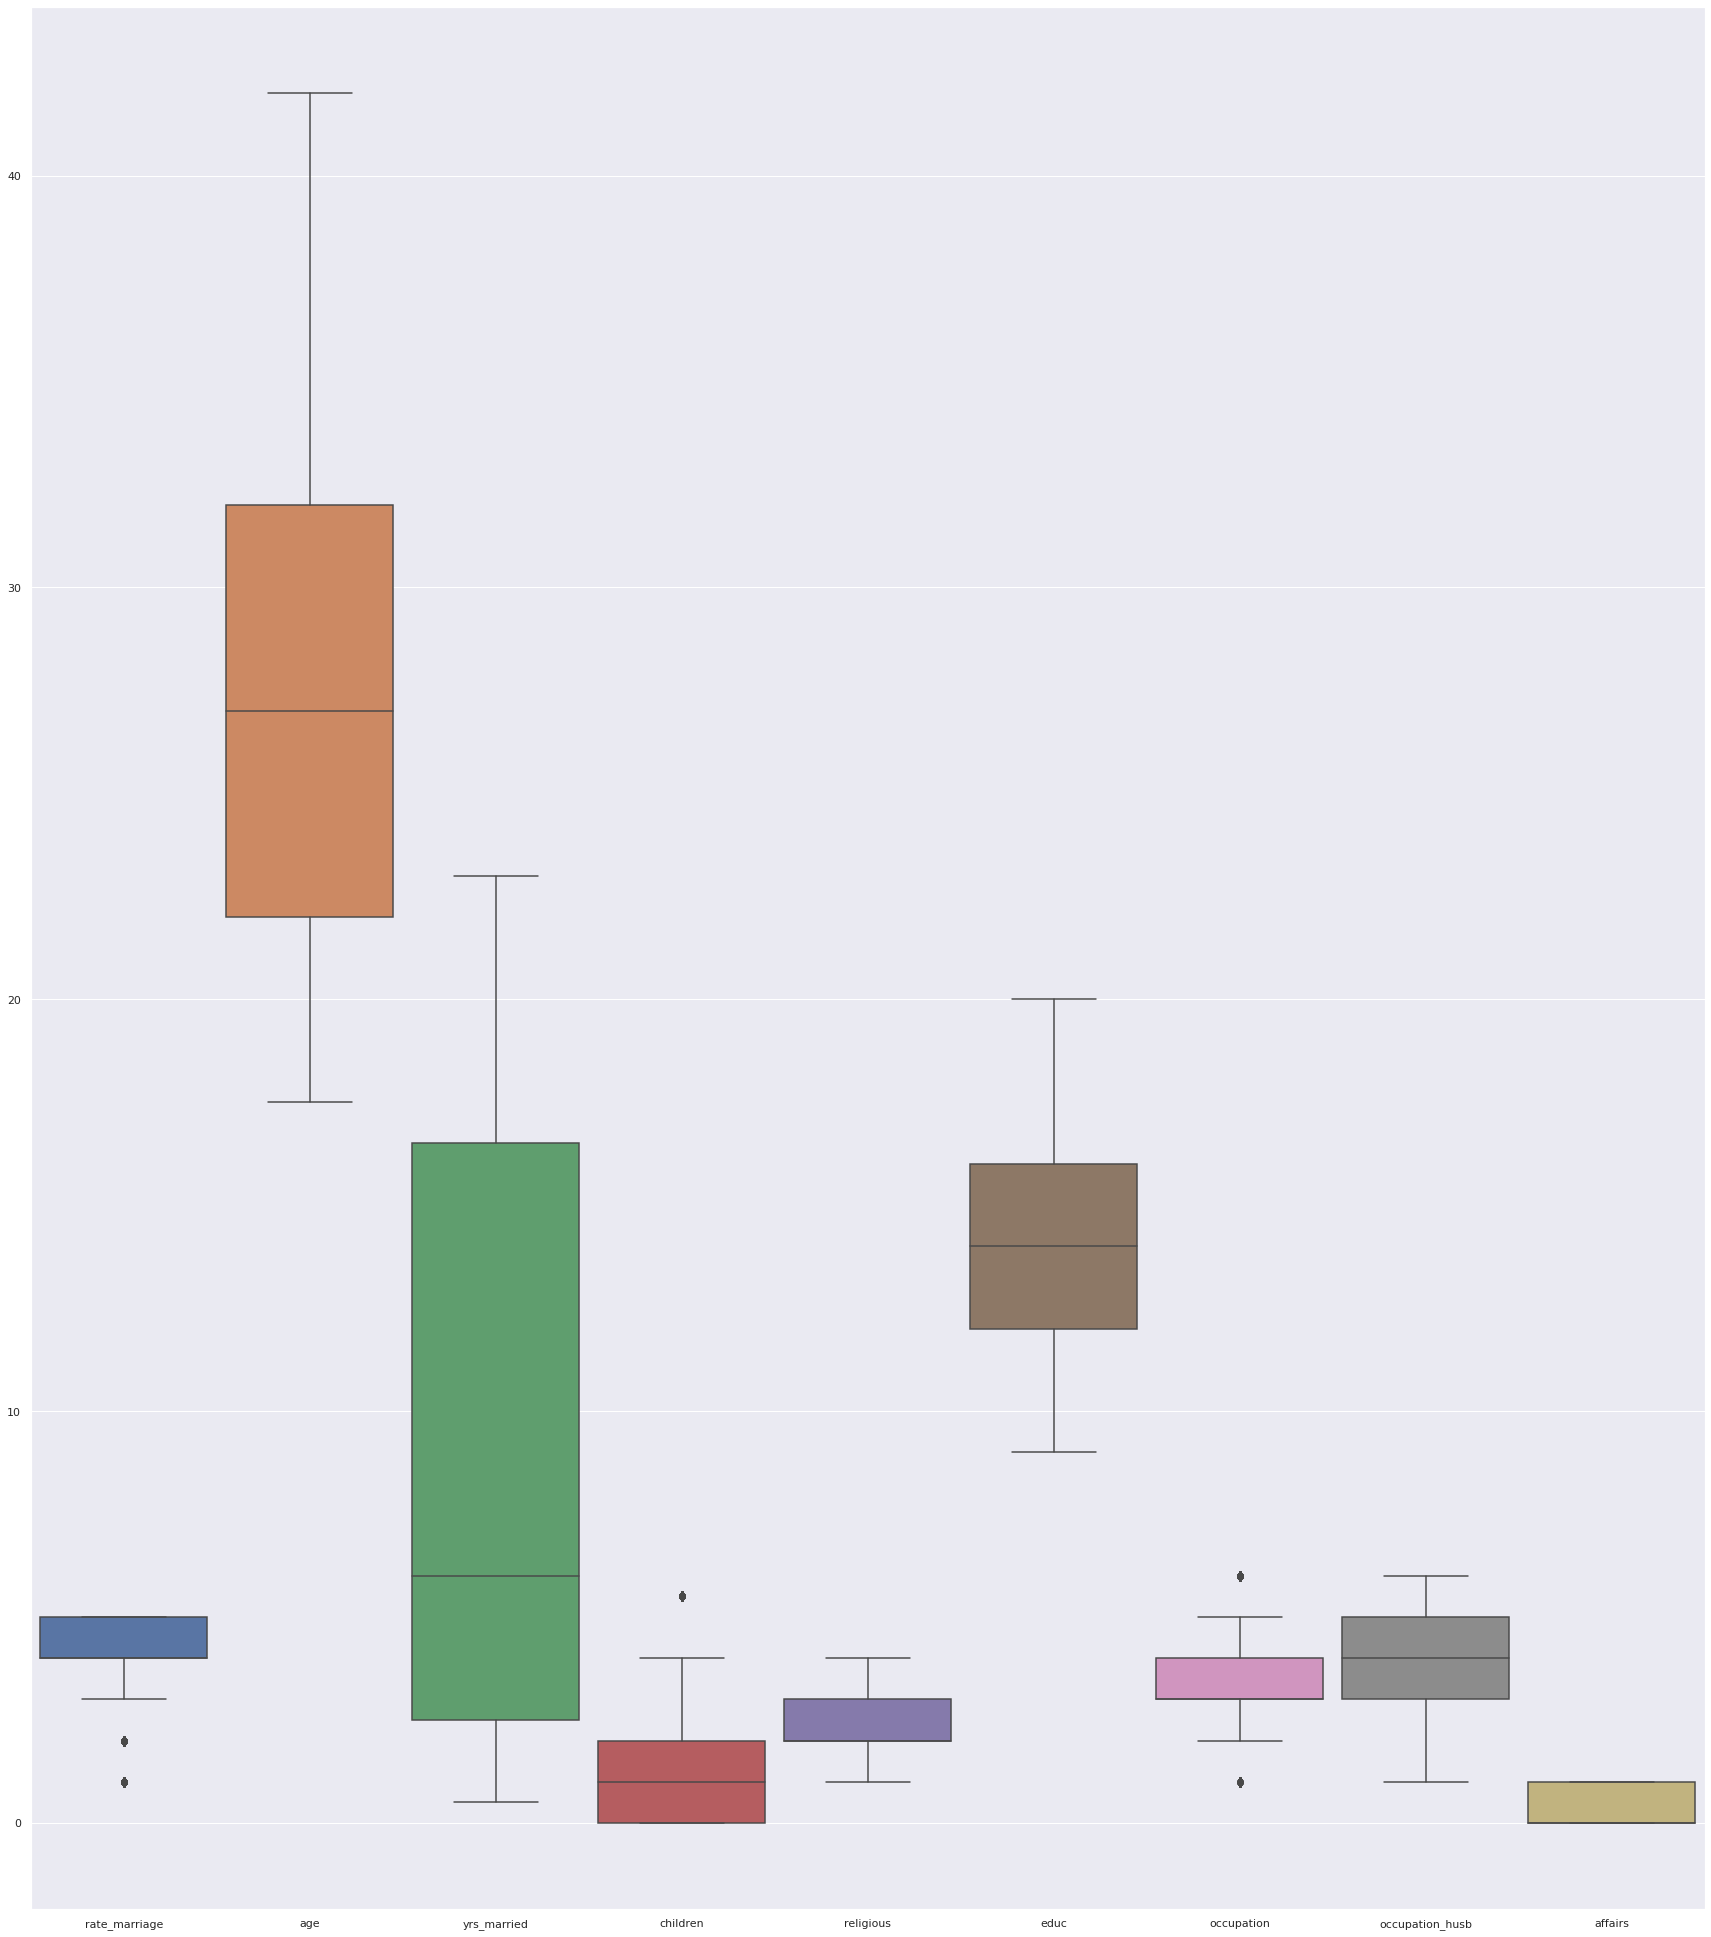

In [42]:
fig,ax=plt.subplots(figsize=(30,35))
sns.boxplot(data=data,ax=ax,width=0.9,fliersize=7)

## pairplot

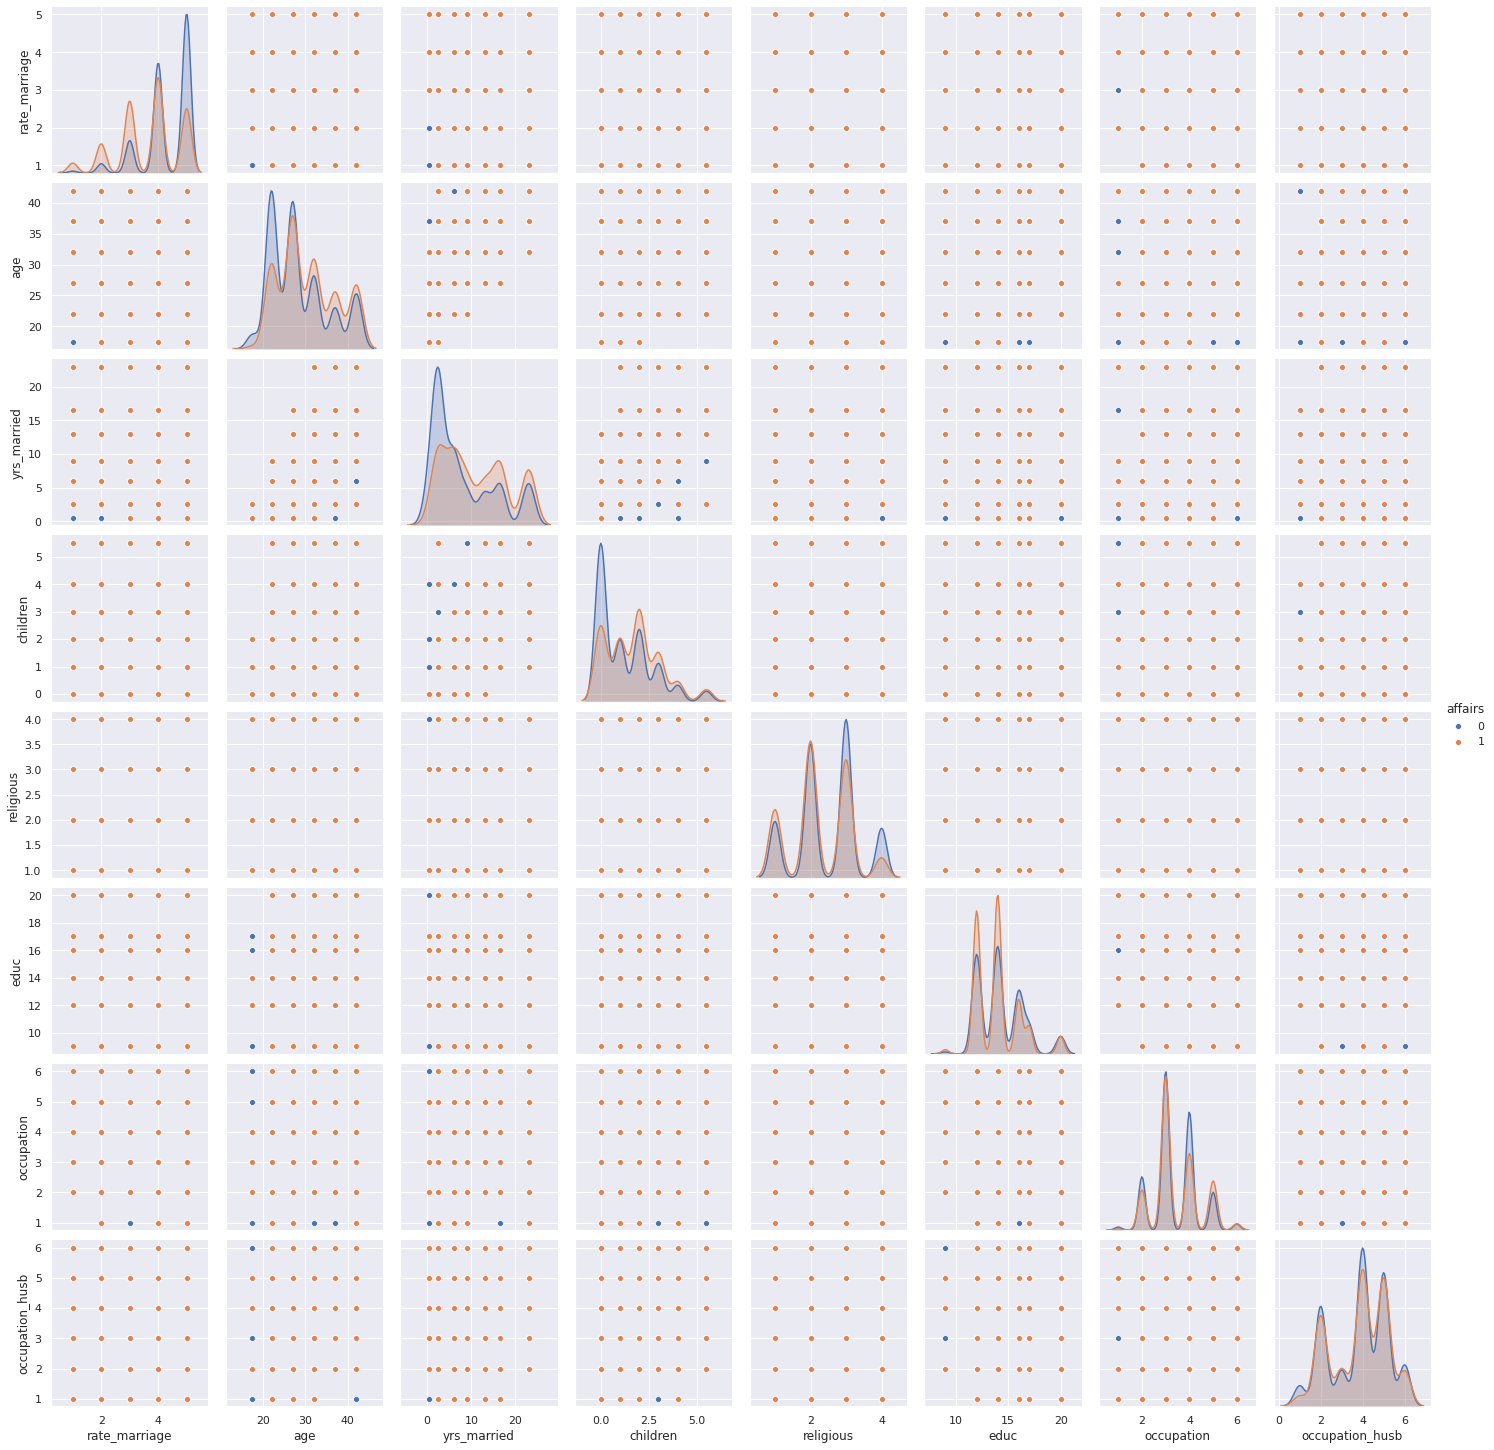

In [43]:
p=sns.pairplot(data=data,hue='affairs')

## Heatmap


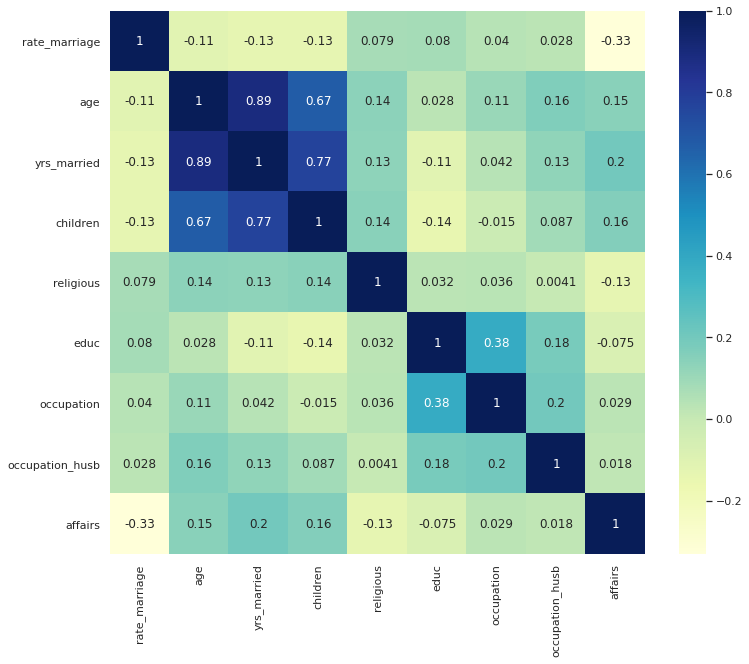

In [44]:
plt.figure(figsize=(12,10))
p=sns.heatmap(data.corr(),annot=True,cmap ='YlGnBu')

In [45]:
data.drop(columns=['age'],inplace=True)

In [46]:
data.shape

(6366, 8)

In [47]:
x1=data
x2=x1.drop([0,1])

In [48]:
x1=data.drop(data['affairs'])
y=x2['affairs']


In [49]:
x1.shape

(6364, 8)

In [50]:
y.shape

(6364,)

In [51]:
data

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,9.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...,...
6361,5.0,13.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,13.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,2.5,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,6.0,1.0,3.0,14.0,3.0,4.0,0


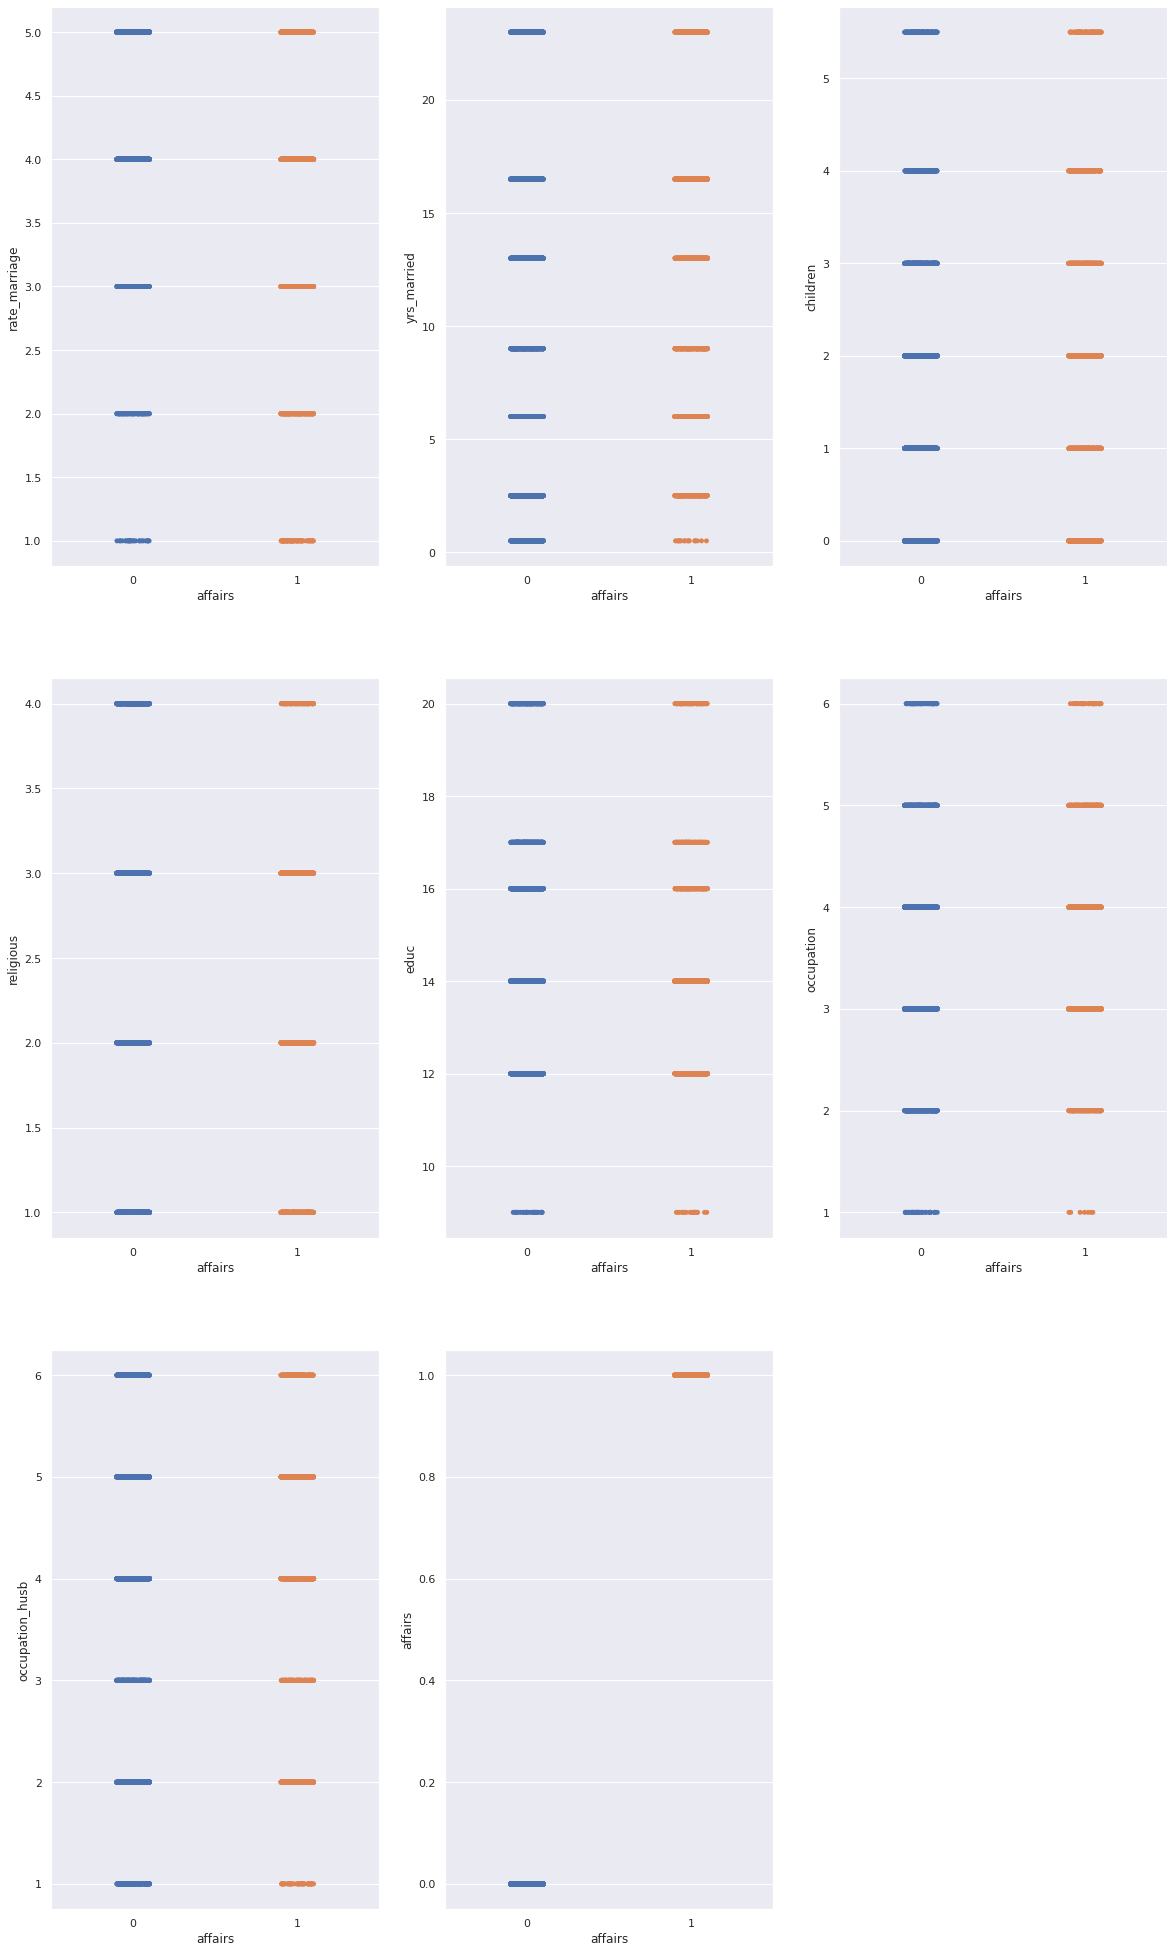

In [52]:
#lets see how data is distributed for every column
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
  
plt.show()    

### Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.14421386e-01, -8.94002001e-01, -9.74233318e-01, ...,
        -4.50412540e-01,  8.54136398e-01,  1.45012987e+00],
       [-1.14421386e-01,  1.02893756e+00,  1.81652608e+00, ...,
         1.67207943e+00,  8.54136398e-01,  1.45012987e+00],
       [ 9.25832468e-01, -1.20863580e-03, -2.76543470e-01, ...,
        -4.50412540e-01,  1.11449687e-01,  1.45012987e+00],
       ...,
       [ 9.25832468e-01, -8.94002001e-01, -9.74233318e-01, ...,
        -4.50412540e-01, -2.11661045e+00, -6.89593408e-01],
       [ 9.25832468e-01, -4.13267112e-01, -2.76543470e-01, ...,
        -4.50412540e-01,  1.11449687e-01, -6.89593408e-01],
       [-1.14421386e-01, -8.94002001e-01, -9.74233318e-01, ...,
        -1.51165853e+00,  1.11449687e-01, -6.89593408e-01]])

In [54]:
x_scaled.shape

(6364, 8)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.139080,rate_marriage
1,2.570990,yrs_married
2,2.526225,children
3,1.055580,religious
4,1.229858,educ
5,1.209235,occupation
6,1.080182,occupation_husb
7,1.184876,affairs


###  All the VIF values are less than 5 and very low, that means no multicollinearity .

In [56]:
data.drop(columns='yrs_married',inplace=True)

In [57]:
data

,rate_marriage,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,0.0,1.0,16.0,3.0,5.0,1
3,4.0,4.0,3.0,16.0,5.0,5.0,1
4,5.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...
6361,5.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,1.0,3.0,14.0,3.0,4.0,0


In [58]:
x

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
2,4.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,9.0,1.0,1.0,14.0,3.0,4.0,1
5,4.0,9.0,0.0,2.0,14.0,3.0,4.0,1
6,5.0,23.0,5.5,2.0,12.0,5.0,4.0,1
...,...,...,...,...,...,...,...,...
6361,5.0,13.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,13.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,2.5,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,6.0,1.0,3.0,14.0,3.0,4.0,0


In [59]:
#splitting data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.50,random_state=300)

In [60]:
x_scaled.shape

(6364, 8)

In [61]:
y.shape

(6364,)